# Module 4 - Multiple Classifier Comparison 

in this module you will learn how to compare classifiers. 


[reference](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

### Step 1: Load basic python libraries 

In [9]:
%matplotlib inline 
# This is used to display images within the browser 
import os
try:
    import cPickle as pickle
except:
    import pickle
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Read the dataset
In this case the training dataset is just a csv file. In case of larger dataset more advanced file fromats like hdf5 are used.
Pandas is used to load the files.

In [10]:

Data=pd.read_csv ('DataExample.csv')


## Creating training sets

Each class of tissue in our pandas framework has a pre assigned label (Module 1).
This labels were: 
- ClassTissuePost
- ClassTissuePre
- ClassTissueFlair
- ClassTumorPost
- ClassTumorPre
- ClassTumorFlair
- ClassEdemaPost
- ClassEdemaPre
- ClassEdemaFlair

For demontration purposes we will create a feature vector that contains the intesities for the tumor and white matter area from the T1w pre and post contrast images. 

In [11]:
ClassBrainTissuepost=(Data['ClassTissuePost'].values)
ClassBrainTissuepost= (np.asarray(ClassBrainTissuepost))
ClassBrainTissuepost=ClassBrainTissuepost[~np.isnan(ClassBrainTissuepost)]
ClassBrainTissuepre=(Data[['ClassTissuePre']].values)
ClassBrainTissuepre= (np.asarray(ClassBrainTissuepre))
ClassBrainTissuepre=ClassBrainTissuepre[~np.isnan(ClassBrainTissuepre)]
ClassTUMORpost=(Data[['ClassTumorPost']].values)
ClassTUMORpost= (np.asarray(ClassTUMORpost))
ClassTUMORpost=ClassTUMORpost[~np.isnan(ClassTUMORpost)]
ClassTUMORpre=(Data[['ClassTumorPre']].values)
ClassTUMORpre= (np.asarray(ClassTUMORpre))
ClassTUMORpre=ClassTUMORpre[~np.isnan(ClassTUMORpre)]
X_1 = np.stack((ClassBrainTissuepost,ClassBrainTissuepre)) # we only take the first two features.
X_2 = np.stack((ClassTUMORpost,ClassTUMORpre))
X=np.concatenate((X_1.transpose(), X_2.transpose()),axis=0)
y =np.zeros((np.shape(X))[0])
y[np.shape(X_1)[1]:]=1

## Compare classifiers 


List of classifier considered 
- Nearest Neighbors
- Linear SVM
- RBF SVM
- Decision Tree
- Random Forest
- AdaBoost
- Naive Bayes 
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis

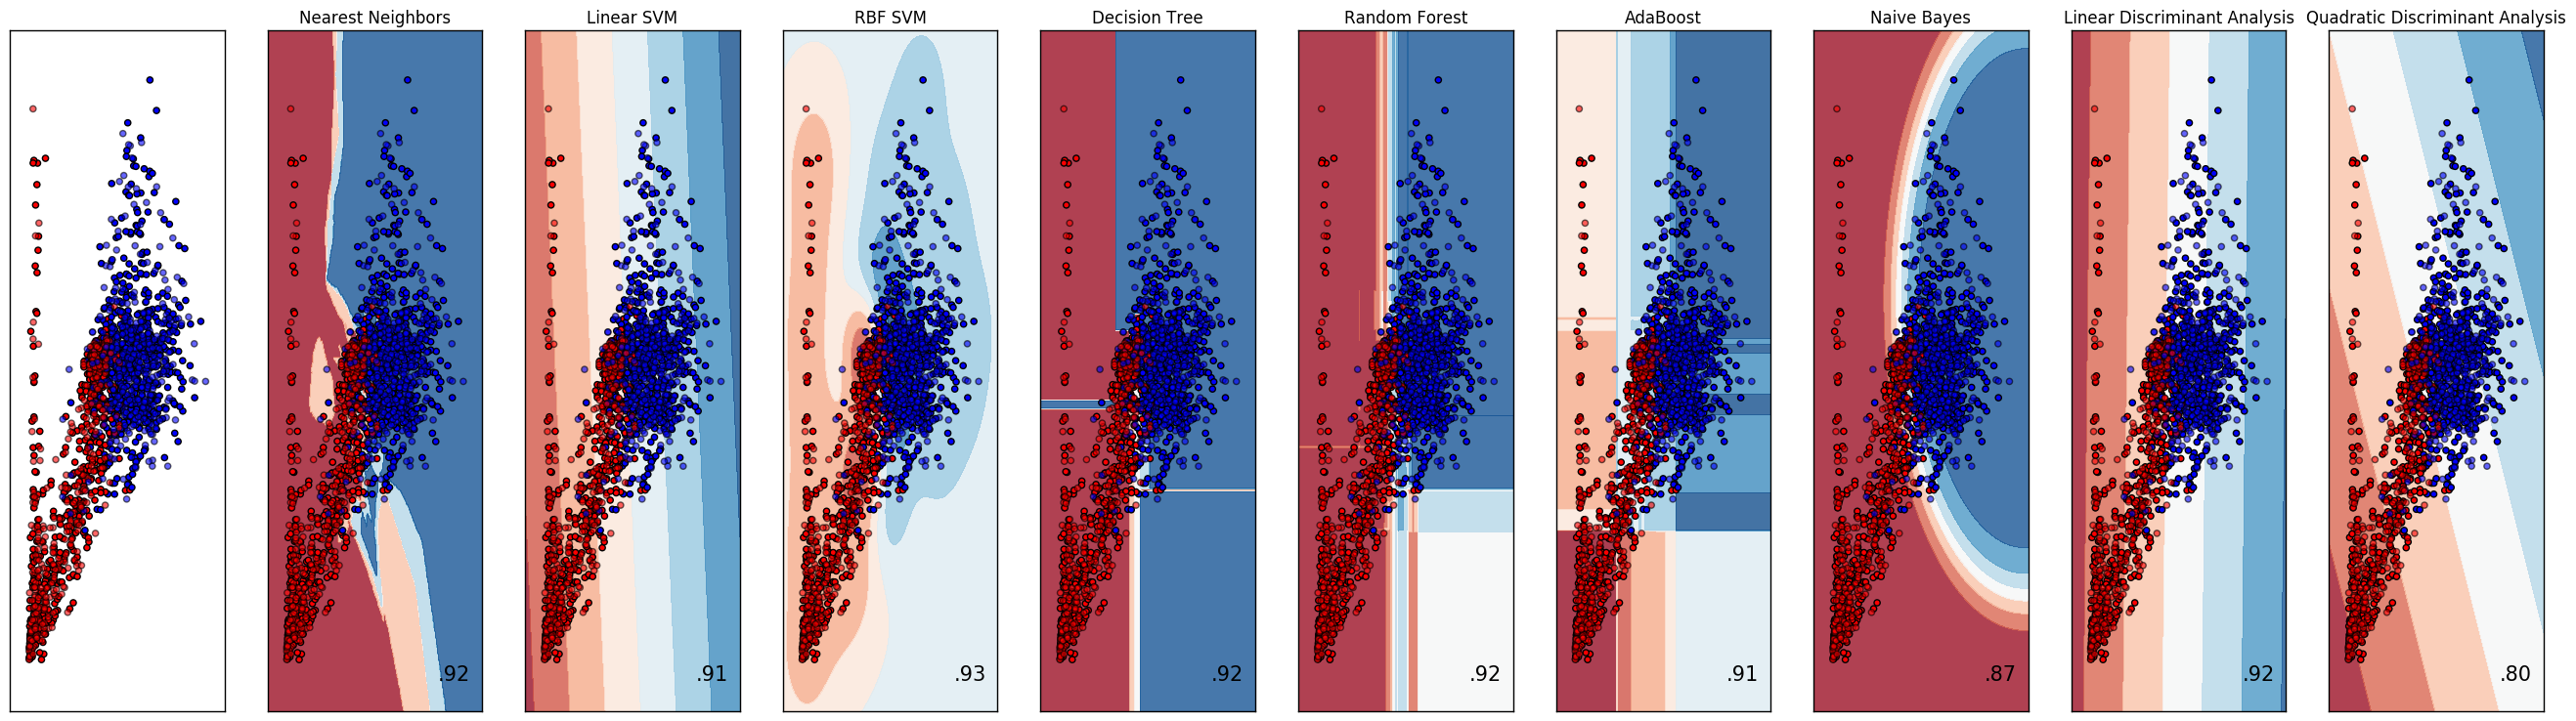

In [12]:
h = .02  # step size in the mesh (parameter for ploting purposes)

data = (X, y)
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]


# Feel free to experiment with the parameters and observe the effects on the classification borders 

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(reg_param=1)]


datasets = [data]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        # Finally save the classifier
        with open(name+'.pkl', 'wb') as fid:
            pickle.dump(clf, fid) 

figure.subplots_adjust(left=.02, right=.98)
plt.show()
